# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import random #sampling
from statsmodels.stats import weightstats #z-test
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
#df.head(15)

### 1.) Is the distribution of body temperatures normal? First check is to plot a histogram of temperature.

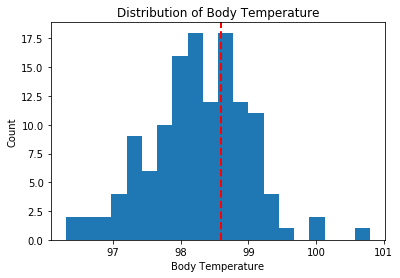

In [4]:
plt.hist(df['temperature'], bins=20)
plt.xlabel('Body Temperature')
plt.ylabel('Count')
plt.title('Distribution of Body Temperature')
plt.axvline(98.6, color='r', linestyle='dashed', linewidth=2) #plot where 98.6 degrees is
plt.show()

In [5]:
# Also including quick summary statistics.
print("Mean: ", np.mean(df['temperature']))
print("Standard Deviation: ", np.std(df['temperature']))

Mean:  98.24923076923078
Standard Deviation:  0.7303577789050377


In [6]:
### TODO: Other checks for normality

### 2A.) Is the sample size large?

In [7]:
# Is sample size large?
print(df.shape[0]) #Yes

130


### 2B.) Are the observations independent?

In [8]:
### TODO: Check for independence
# Sample size is less than 10 percent of population (all humans) and subjects were assigned randomly

### 3.) Is the true population mean really 98.6 degrees F?

### 3A.) Bootstrap test

C:\Users\Tom\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


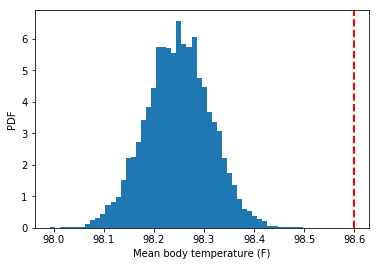

In [9]:
# Following comes from Datacamp Statistical Thinking in Python Part 2 Exercise 2
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)

# Compute SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))

# Compute standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Mean body temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.axvline(98.6, color='r', linestyle='dashed', linewidth=2) #plot where 98.6 degrees is
plt.show()



### 3B.) Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

### 3C.) In this situation, is it appropriate to use the t or z statistic?

In [10]:
print("T-Statistic:", stats.ttest_1samp(df.temperature, 98.6)[0])
print("P-value:", stats.ttest_1samp(df.temperature, 98.6)[1])

T-Statistic: -5.4548232923645195
P-value: 2.4106320415561276e-07


### 3D.) Now try using the other test. How is the result different? Why?

In [11]:
print("Z-Statistic:", sm.stats.weightstats.ztest(df.temperature, value=98.6)[0])
print("P-Value: ", sm.stats.weightstats.ztest(df.temperature, value=98.6)[1])

Z-Statistic: -5.4548232923645195
P-Value:  4.9021570141012155e-08


### 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [12]:
random_sample = random.sample(list(df['temperature']), 10)

print("Z-Statistic:", sm.stats.weightstats.ztest(random_sample, value=98.6)[0])
print("P-Value: ", sm.stats.weightstats.ztest(random_sample, value=98.6)[1])
print("T-Statistic:", stats.ttest_1samp(random_sample, 98.6)[0])
print("P-value:", stats.ttest_1samp(random_sample, 98.6)[1])

Z-Statistic: -1.652112314869085
P-Value:  0.09851165695614349
T-Statistic: -1.652112314869085
P-value: 0.1329043308380879


### 4A.) Which one is the correct one to use?

### 4B.) What do you notice? What does this tell you about the difference in application of the t and z statistic?

### 5.) At what temperature should we consider someone's temperature to be "abnormal"?


In [13]:
#As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


In [18]:
# Start by computing the margin of error and confidence interval.

# We already have what we need from bootstrapping from problem 3. 
# Now it's just taking the 2.5%ile and 97.5%ile of the bootstrapped sample and we're good to go.

print("Less than" , round(np.percentile(bs_replicates, [2.5])[0], 2) , "or greater than" , round(np.percentile(bs_replicates, [97.5])[0], 2) , "degrees.")

Less than 98.12 or greater than 98.37 degrees.


In [7]:
# Margin of error
upper_bound = round(np.mean(df['temperature']) + stats.t.ppf(1-0.025, 129) * np.std(df['temperature']), 2)
lower_bound = round(np.mean(df['temperature']) - stats.t.ppf(1-0.025, 129) * np.std(df['temperature']), 2)
print("Less than" , lower_bound , "or greater than" , upper_bound , "degrees.")

Less than 96.8 or greater than 99.69 degrees.


### 6.) Is there a significant difference between males and females in normal temperature?


In [9]:
### What testing approach did you use and why?

# This requires a two-sample ttest. Our null hypothesis will be that there is no difference in temperature between the genders.
# Significance level will be .05

male_data = df[df['gender']=='M']
female_data = df[df['gender']=='F']
print("T-Statistic: ", stats.ttest_ind(male_data.temperature, female_data.temperature)[0])
print("P-value: ", stats.ttest_ind(male_data.temperature, female_data.temperature)[1])
print("Male mean temp: ", np.mean(male_data.temperature))
print("Female mean temp: ", np.mean(female_data.temperature))

T-Statistic:  -2.2854345381656103
P-value:  0.02393188312239561
Male mean temp:  98.1046153846154
Female mean temp:  98.39384615384613


In [16]:
### Write a story with your conclusion in the context of the original problem.